In [1]:
import proplot as pplt

In [11]:
import hybrideb

theta_min = 0.25 # arcmin
theta_max = 250 # arcmin
Ntheta = 250 # number of bins in log(theta)
Nl = 10

heb = hybrideb.HybridEB(theta_min, theta_max, Ntheta)
beb = hybrideb.BinEB(theta_min, theta_max, Ntheta)

geb = hybrideb.GaussEB(beb, heb, Nl=Nl, lmin=200)

res = geb(3)  # grab the third estimator
theta_rad = res[0]
# X+ = np.sum((fp*xip + fm*xim)/2)
# X- = np.sum((fp*xip - fm*xim)/2)
fp = res[1]
fm = res[2]

# X+ = \int ell factors(ell) (wp * Pe + wm * Pb)
# X- = \int ell factors(ell) (wm * Pe + wp * Pb)
ell = res[3]
wp = res[4]
wm = res[5]

making GaussEB estimators: 100%|████████████████| 10/10 [00:28<00:00,  2.82s/it]


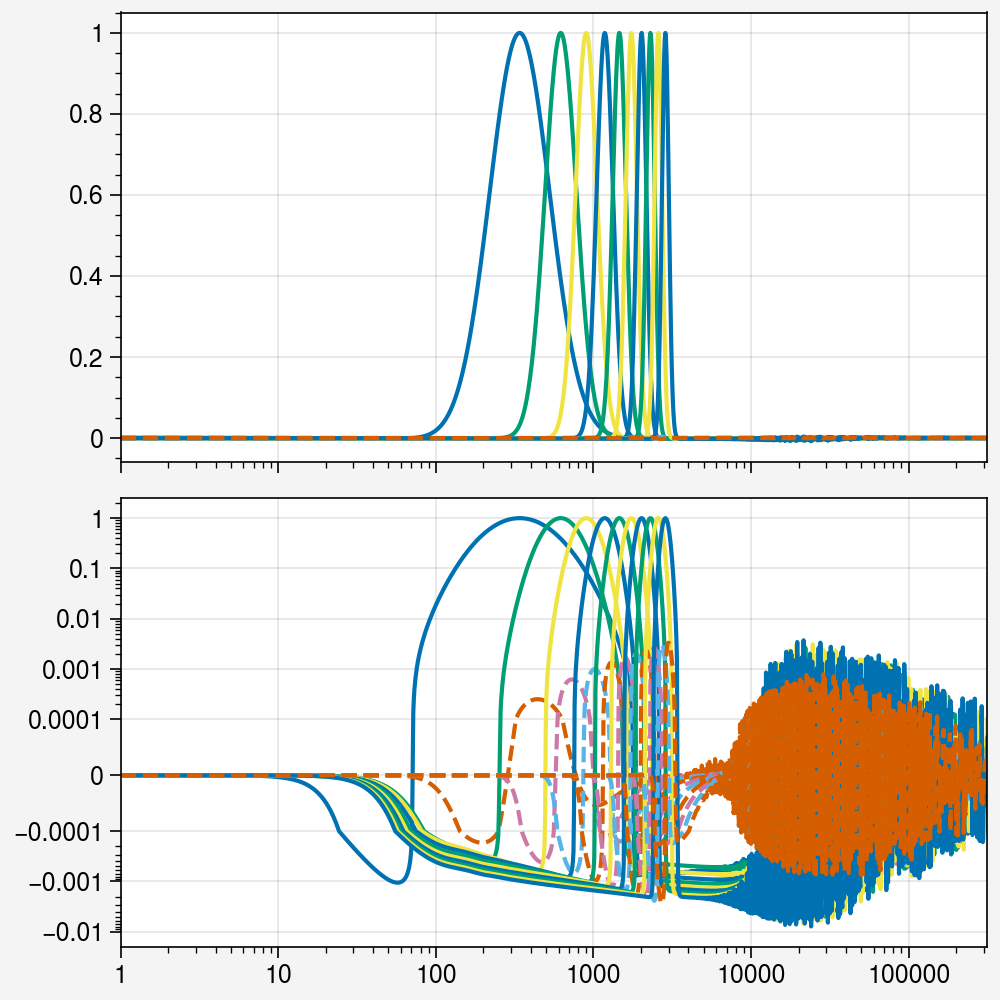

In [15]:
fig, axs = pplt.subplots(figsize=(5, 5), nrows=2)

for i in range(Nl):
    res = geb(i)
    ell = res[3]
    wp = res[4]
    wm = res[5]    

    axs[0].plot(ell, wp/wp.max())
    axs[0].plot(ell, wm/wp.max(), linestyle="dashed")

    axs[0].format(xscale="log", yscale="linear")

    axs[1].plot(ell, wp/wp.max())
    axs[1].plot(ell, wm/wp.max(), linestyle="dashed")
    axs[1].format(yscale="symlog", xscale="log", yscale_kw={"linthresh": 0.0001})
